In [15]:
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [16]:
digits = load_digits()
X = digits.data

In [17]:
print(digits.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [18]:
def calculate_euclidean(a, b):
    return np.sqrt(np.sum((a - b)**2))

In [19]:
class KMeansCustom:
    def __init__(self, k=10, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        n, d = X.shape

        # randomly pick initial centroids
        centroids = X[np.random.choice(n, self.k, replace=False)]

        for _ in range(self.max_iters):

            # assign each point to the nearest cluster
            clusters = np.zeros(n, dtype=int)
            for i in range(n):
                dists = [calculate_euclidean(X[i], centroids[c]) for c in range(self.k)]
                clusters[i] = np.argmin(dists)

            new_centroids = np.zeros_like(centroids)
            for c in range(self.k):
                pts = X[clusters == c]
                if len(pts) > 0:
                    new_centroids[c] = np.mean(pts, axis=0)
                else:
                    # if cluster is empty, reinitialize randomly
                    new_centroids[c] = X[np.random.randint(0, n)]

            # if centroids haven't changed, then stop due to convergence
            if np.allclose(new_centroids, centroids):
                centroids = new_centroids
                break

            centroids = new_centroids

        self.centroids = centroids
        self.clusters = clusters
        self.loss = self.compute_loss(X)

        return centroids, clusters

    def compute_loss(self, X):
        loss = 0
        for i in range(len(X)):
            c = self.clusters[i]
            loss += calculate_euclidean(X[i], self.centroids[c])**2
        return loss

In [20]:
class KMedoidsCustom:
    def __init__(self, k=10, max_iters=50):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        n = len(X)

        # initialize medoids randomly by randomly selecting k points
        medoids = np.random.choice(n, self.k, replace=False)

        for _ in range(self.max_iters):

            # assign each point to the nearest medoid
            clusters = np.zeros(n, dtype=int)
            for i in range(n):
                dists = [calculate_euclidean(X[i], X[m]) for m in medoids]
                clusters[i] = np.argmin(dists)

            new_medoids = medoids.copy()

            for c in range(self.k):
                indices = np.where(clusters == c)[0]
                if len(indices) == 0:
                    continue

                best = indices[0]
                best_dist = float("inf")
                for i in indices:
                    total = np.sum([calculate_euclidean(X[i], X[j]) for j in indices])
                    if total < best_dist:
                        best_dist = total
                        best = i

                new_medoids[c] = best

            # if medoids haven't changed, then stop due to convergence
            if np.array_equal(new_medoids, medoids):
                medoids = new_medoids
                break

            medoids = new_medoids

        self.medoid_indices = medoids
        self.clusters = clusters
        self.loss = self.compute_loss(X)

        return medoids, clusters

    def compute_loss(self, X):
        loss = 0
        for i in range(len(X)):
            m = self.medoid_indices[self.clusters[i]]
            loss += calculate_euclidean(X[i], X[m])
        return loss

In [21]:
k = 10
kmeans = KMeansCustom(k=k)
centroids, clusters_kmeans = kmeans.fit(X)
print("K-means loss:", kmeans.loss)

K-means loss: 1177038.8671767062


In [22]:
kmedoids = KMedoidsCustom(k=k)
medoid_indices, clusters_kmedoids = kmedoids.fit(X)
print("K-medoids loss:", kmedoids.loss)

K-medoids loss: 52463.75611453319


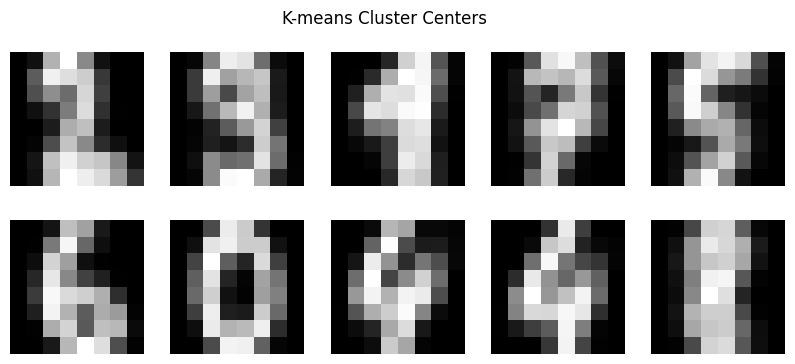

In [23]:
plt.figure(figsize=(10, 4))
plt.suptitle("K-means Cluster Centers")
for i in range(k):
    plt.subplot(2,5,i+1)
    plt.imshow(centroids[i].reshape(8,8), cmap='gray')
    plt.axis("off")

plt.show()

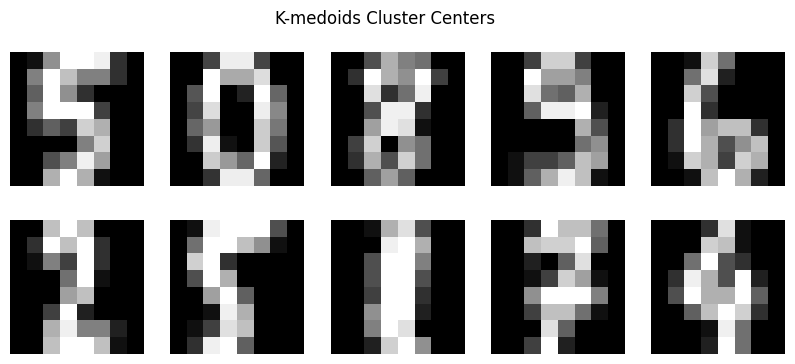

In [24]:
plt.figure(figsize=(10, 4))
plt.suptitle("K-medoids Cluster Centers")
for i in range(k):
    plt.subplot(2,5,i+1)
    plt.imshow(X[medoid_indices[i]].reshape(8,8), cmap='gray')
    plt.axis("off")

plt.show()